# 2️⃣ Exploratory Data Analysis (EDA)
**designed by:** [datamover.ai](https://www.datamover.ai)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

# Set random seed
np.random.seed(42)

**1 Load train set and sample the dataset to a manageable size if necessary**

In [9]:
data = pd.read_csv("./data/data_train.csv")
data.head(3)

,Price,Address,Zip,Area,Room,Lon,Lat
0,425000.0,"Lamarckhof 11 I, Amsterdam",1098 TK,68,3,4.944251,52.352317
1,520000.0,"Kiefskamp 24, Amsterdam",1082 KA,80,2,4.872336,52.330330
2,700000.0,"Latherusstraat 54, Amsterdam",1032 EC,123,6,4.915060,52.393449


**2. For supervised learning tasks, identify the target attribute(s)**

In [10]:
TARGET = "Price"

**3 Study each attribute and its characteristics:**

**3 a. Name**

In [11]:
data.columns

Index(['Price', 'Address', 'Zip', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

**3 b. For tabular data, define the data type of each variable, namely:**

- `Nominal`: Named categories, e.g., `gender : ['Female', 'Male']`
- `Ordinal`: Categories with an implied order, e.g. `quality : [Low, Medium, High]`
- `Discrete`: Only particular numbers, e.g., `age: {1,2,3,...,58,59,60}`
- `Continuous`: Any numerical value, e.g. `weight: {38.9,45.5}`
    
**Note 📝:** Nominal and ordinal data types are considered qualitative (**categorical**) features, whereas discrete and continuous data types are considered numerical (**quantitative**) features.

In [12]:
data.head()

,Price,Address,Zip,Area,Room,Lon,Lat
0,425000.0,"Lamarckhof 11 I, Amsterdam",1098 TK,68,3,4.944251,52.352317
1,520000.0,"Kiefskamp 24, Amsterdam",1082 KA,80,2,4.872336,52.330330
2,700000.0,"Latherusstraat 54, Amsterdam",1032 EC,123,6,4.915060,52.393449
3,295000.0,"1e Kekerstraat 119, Amsterdam",1104 VA,91,3,4.981371,52.313749
4,650000.0,"Nieuwevaartweg, Amsterdam",1019 AL,87,4,4.954376,52.367982


In [14]:
# wrap info in a dataframe
df_datatype = pd.DataFrame.from_dict(
    {
        "Price": "continuous",  # <- This is our TARGET
        "Address": "nominal",
        "Zip": "nominal",
        "Area": "continuous",
        "Room": "discrete",
        "Lon": "continuous",
        "Lat": "continuous",
    },
    orient="index",
    columns=["data_type"],
)
df_datatype.transpose()

,Price,Address,Zip,Area,Room,Lon,Lat
data_type,continuous,nominal,nominal,continuous,discrete,continuous,continuous


**3 c. Percentage of missing values, namely** `np.NaN` 
- [missingno](https://github.com/ResidentMario/missingno) can be a useful tool for visualization;
- make sure that missing values are encoded in a specific ways, e.g. `-1`, `"?"`


In [15]:
print(
    f"o {data.isna().sum().sum()} ({data.isna().sum().sum()/data.shape[0]*data.shape[1]:.2f}%) of missing values"
)

o 4 (0.04%) of missing values


Check if missing values are represented in a different way as in the description of the dataset it is stated that there are missing values.

In [16]:
print(
    "Because of the small dataset, we checked for abnormalities by a manual inspection."
)

Because of the small dataset, we checked for abnormalities by a manual inspection.


In [19]:
# store info as a dataframe
df_missing_value = data.isna().sum().to_frame(name="missing values")
display(df_missing_value.transpose())

,Price,Address,Zip,Area,Room,Lon,Lat
missing values,4,0,0,0,0,0,0


In [20]:
# print samlples with missing values
display(data[data.isna().any(axis=1)])

,Price,Address,Zip,Area,Room,Lon,Lat
11,NaN,"Haarlemmerweg 705, Amsterdam",1067 HP,366,12,4.787874,52.383877
132,NaN,"Falckstraat 47 A, Amsterdam",1017 VV,147,3,4.897454,52.360707
456,NaN,"Zeeburgerkade 760, Amsterdam",1019 HT,107,3,4.945022,52.369244
593,NaN,"Suikerplein 16, Amsterdam",1013 CK,81,3,4.880976,52.389623


**3 d. Check any duplicates and discard them**

In [21]:
# check if there are duplicated rows in the dataset
print(
    f"o {data.duplicated().sum()} ({data.duplicated().sum()/len(data):.3f}%) of duplicate values"
)

o 0 (0.000%) of duplicate values


**3 e. Noisiness and type of noise e.g. stochastic, rounding errors, etc.** (might require business knowledge)


In [22]:
# Let us assume that we have noise-free features
df_type_noise = pd.DataFrame(
    data={"type of noise": len(data.columns) * ["noise-free"]}, index=data.columns
)

**3 f. Type of distribution (Gaussian, Poisson, etc.). Check [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm) for common type of distributions**. 

It is recommended to visualize each feature  🕵️📊


In [23]:
# let's visualize the data per datatype
df_datatype["data_type"].unique()

array(['continuous', 'nominal', 'discrete'], dtype=object)

Visualize **nominal** distributions

In [24]:
# get list with nominal features, only
list_nominal = df_datatype.loc[lambda x: x["data_type"] == "nominal"].index
print(list_nominal)
print(f"o {len(list_nominal)} nominal features")

print(
    "NOTE: We will skip for now the visualization of nominal features as we do not have a good way to visualize them."
)

Index(['Address', 'Zip'], dtype='object')
o 2 nominal features
NOTE: We will skip for now the visualization of nominal features as we do not have a good way to visualize them.


Visualize **ordinal** distributions

In [25]:
# get list with ordinal features, only
list_ordinal = df_datatype.loc[lambda x: x["data_type"] == "ordinal"].index
print(list_ordinal)
print(f"o {len(list_ordinal)} ordinal features")

Index([], dtype='object')
o 0 ordinal features


Visualize **discrete** distributions

In [26]:
# get list with discrete features, only
list_discrete = df_datatype.loc[lambda x: x["data_type"] == "discrete"].index
print(list_discrete)
print(f"o {len(list_discrete)} discrete features")

Index(['Room'], dtype='object')
o 1 discrete features


<Axes: xlabel='Room', ylabel='Count'>

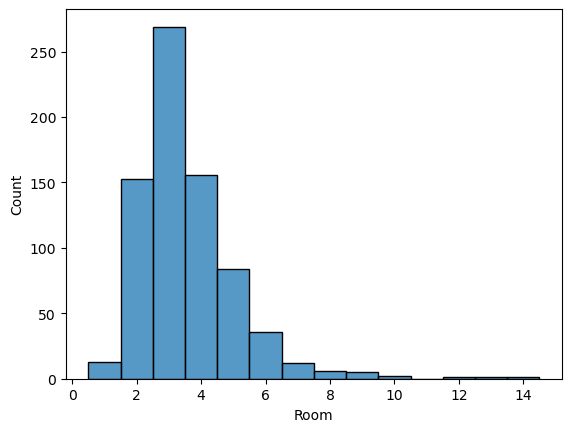

In [27]:
# create subplot with 9 plots
sns.histplot(data=data, x=list_discrete[0], binwidth=3, bins=40, discrete=True)

Visualize **continuous** distributions

In [37]:
# get list with numerical features, only
list_continuous = df_datatype.loc[lambda x: x["data_type"] == "continuous"].index
print(list_continuous)
print(f"o {len(list_continuous)} continuous features")

Index(['Price', 'Area', 'Lon', 'Lat'], dtype='object')
o 4 continuous features


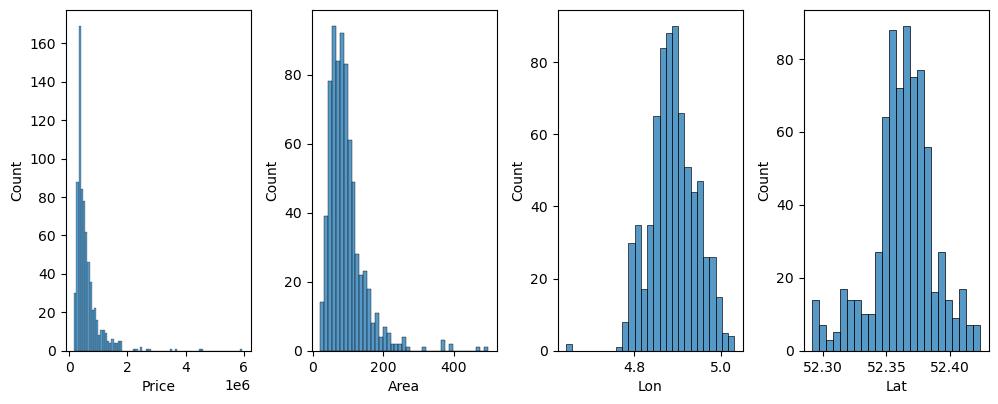

In [42]:
# create subplots with 4 plots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
fig.tight_layout(w_pad=1.0)

for i in range(0, axs.shape[0]):
    sns.histplot(data=data, x=list_continuous[i], discrete=False, ax=axs[i])

We obseve that the features `Price` and `Area` are highly skewed. Conversely `Lon` and `Lat` are fairly normally distributed.

**3 f. Examine outliers for discrete and numerical features and check whether they make sense** (might require business knowledge);

Note 📝: A common way to identify outliers is by considering all $ \mathrm{samples} > 3 \cdot std$ (if you want to be more conservative you can consider $4 \cdot std$ as threshold).


In [43]:
# initialize empty dataframe
df_outlier = pd.DataFrame()

# select threshold between {3,4}
thr = 3

# generate summary of outlier
for feat in list(list_discrete) + list(list_continuous):
    df_outlier = pd.concat(
        [
            df_outlier,
            pd.DataFrame(
                data={
                    f"mean": round(data[feat].mean(), 2),
                    f"{thr}xstd": round(thr * data[feat].std(), 2),
                    f"n outlier ({thr} x std)": data.loc[
                        lambda x: x[feat] > x[feat].mean() + thr * x[feat].std(), feat
                    ].count(),
                    f"% outlier ({thr} x std)": str(
                        round(
                            data.loc[
                                lambda x: x[feat]
                                > x[feat].mean() + thr * x[feat].std(),
                                feat,
                            ].count()
                            / data.shape[0],
                            2,
                        )
                        * 100
                    )
                    + "%",
                },
                index=[feat],
            ),
        ]
    )

display(df_outlier)
print("Note: outliers are defined e.g. as values above the mean + 3 x std")

,mean,3xstd,n outlier (3 x std),% outlier (3 x std)
Room,3.55,4.58,10,1.0%
Price,605929.67,1456688.11,11,1.0%
Area,94.41,159.57,13,2.0%
Lon,4.89,0.16,0,0.0%
Lat,52.36,0.07,0,0.0%


Note: outliers are defined e.g. as values above the mean + 3 x std


**EDA summary**

4. Annotate all information from EDA, e.g.
    - type of data;
    - if there are missing values and how to deal with them;
    - the ratio of facets for categorical features;
    - the type of distribution;  
    - Identify the promising transformations you may want to apply (e.g. log-transformation for highly skewed distribution and\or cluster facets to mitigate group imbalance);
5. Identify extra data that would be useful;
6. Document analysis and send to manager and/or customer.


In [44]:
# get summary table and store as a csv
data_info = df_datatype.join(df_missing_value).join(df_type_noise)
display(data_info.transpose())
data_info.to_csv("./data/data_info.csv")

,Price,Address,Zip,Area,Room,Lon,Lat
data_type,continuous,nominal,nominal,continuous,discrete,continuous,continuous
missing values,4,0,0,0,0,0,0
type of noise,noise-free,noise-free,noise-free,noise-free,noise-free,noise-free,noise-free


In [61]:
# Quantify the summary statistics of the target

print(
    f"o Dutch House {TARGET} has a mean (std) of {int(data[TARGET].mean())} ({int(data[TARGET].std())}) EUR"
)
print(f"o The Median value of {TARGET} is {int(data[TARGET].median())} EUR")
print(
    f"o The Mininum value of {TARGET} is {int(data[TARGET].min())} EUR with an Area of {data.loc[data[TARGET].idxmin(), 'Area']} m2 and {data.loc[data[TARGET].idxmin(), 'Room']} room"
)
print(
    f"o The Maximum value of {TARGET} is {int(data[TARGET].max())} EUR with an Area of {data.loc[data[TARGET].idxmax(), 'Area']} m2 and {data.loc[data[TARGET].idxmax(), 'Room']} room"
)
print(
    f"o 25% and 75% of the Dutch House {TARGET} are {int(data[TARGET].quantile(0.25))} and {int(data[TARGET].quantile(0.75))} EUR, respectively"
)

# Note: watch out to string having leading or trailing spaces

o Dutch House Price has a mean (std) of 605929 (485562) EUR
o The Median value of Price is 465000 EUR
o The Mininum value of Price is 175000 EUR with an Area of 28 m2 and 1 room
o The Mininum value of Price is 5950000 EUR with an Area of 394 m2 and 10 room
o 25% and 75% of the Dutch House Price are 350000 and 688750 EUR, respectively


**Summary**

- Target: `Price` is highly skewed as the median value differs significantly from its mean;
- There are 2 nominal, 4 continuous and 1 discrete feature;
- There are 4 (0.04%) missing values, and they arise all in the target; 
- The Nominal features, i.e., `Adress` and `Zip`, will require some feature engineering to increase the predictive power of these features.
- `Lat` and `Lon` are expected to be combined somehow using feature engineering techniques; 
- `Area` as well as `Price` are highly skewed; hence we expect to apply a log transformation to normalise such features;